# Data Cleansing

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import skew

from scipy.stats.mstats import winsorize

#### Load the dataset

In [2]:
df = pd.read_excel('Dataset.xlsx')

## Understanding the Dataset

In [3]:
# View the first few rows of the dataset
df.head(25)

,Product,ProductGroup,ProductType,Agency,WorkflowStatus,Indexation,NoOfLives,PropDate,CommDateProvided,PaymentFreq,...,RenewalSacrificeType,CommissionSacrificePercentage,CommissionTerms,Discount,BonusCommission,BonusCommissionPercentage,FreeCover,SeriousIllnessType,SignedDecReceived,PolicyIssued
0,7,4,4,775,4,1,1,2017-01-02,0,2,...,3,0.00,1,0,0,0.0,0,2,0,1
1,6,4,3,811,4,1,1,2017-01-03,0,2,...,3,0.00,1,0,1,25.0,0,2,0,1
2,3,2,3,776,4,0,2,2017-01-03,0,2,...,3,0.00,1,0,0,0.0,0,2,0,1
3,3,2,3,44,4,0,2,2017-01-03,0,2,...,3,39.99,1,0,0,0.0,0,2,0,1
4,3,2,3,463,4,0,1,2017-01-03,0,2,...,3,0.00,1,0,1,10.0,0,2,0,1
5,3,2,3,312,1,0,1,2017-01-03,0,2,...,3,0.00,1,0,1,10.0,0,2,0,1
6,6,4,3,592,4,1,1,2017-01-03,0,2,...,3,0.00,1,0,0,0.0,0,1,0,1
7,3,2,3,312,1,0,2,2017-01-03,0,2,...,3,0.00,2,0,1,10.0,0,2,0,1
8,6,4,3,678,1,1,2,2017-01-03,0,2,...,3,0.00,1,0,1,25.0,0,2,0,0
9,6,4,3,1593,1,0,2,2017-01-03,0,2,...,3,0.00,1,0,1,35.0,0,2,0,1


In [4]:
# View bottom rows of df
df.tail()

,Product,ProductGroup,ProductType,Agency,WorkflowStatus,Indexation,NoOfLives,PropDate,CommDateProvided,PaymentFreq,...,RenewalSacrificeType,CommissionSacrificePercentage,CommissionTerms,Discount,BonusCommission,BonusCommissionPercentage,FreeCover,SeriousIllnessType,SignedDecReceived,PolicyIssued
157258,2,4,2,525,1,1,1,2022-12-30,0,2,...,3,0.0,1,0,0,0.0,0,2,0,1
157259,2,4,2,297,1,0,1,2022-12-31,0,2,...,3,0.0,2,0,0,0.0,0,2,0,1
157260,3,2,3,1191,5,0,2,2022-12-31,1,2,...,3,126.4,1,0,0,0.0,0,2,1,1
157261,3,2,3,1191,1,0,2,2022-12-31,0,2,...,3,126.4,1,0,0,0.0,0,2,1,1
157262,2,4,2,851,1,1,1,2022-12-31,0,2,...,3,0.0,1,0,0,0.0,0,2,0,1


In [5]:
# Get an overview of the dataset, including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157263 entries, 0 to 157262
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product                        157263 non-null  int64         
 1   ProductGroup                   157263 non-null  int64         
 2   ProductType                    157263 non-null  int64         
 3   Agency                         157263 non-null  int64         
 4   WorkflowStatus                 157263 non-null  int64         
 5   Indexation                     157263 non-null  int64         
 6   NoOfLives                      157263 non-null  int64         
 7   PropDate                       157263 non-null  datetime64[ns]
 8   CommDateProvided               157263 non-null  int64         
 9   PaymentFreq                    157263 non-null  int64         
 10  UWDecision                     157263 non-null  int64         
 11  

In [6]:
# Get the list of columns to convert to categorical
categorical_columns = df.select_dtypes(include='int64').columns.tolist()

# Convert the selected columns to categorical
df[categorical_columns] = df[categorical_columns].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157263 entries, 0 to 157262
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Product                        157263 non-null  category      
 1   ProductGroup                   157263 non-null  category      
 2   ProductType                    157263 non-null  category      
 3   Agency                         157263 non-null  category      
 4   WorkflowStatus                 157263 non-null  category      
 5   Indexation                     157263 non-null  category      
 6   NoOfLives                      157263 non-null  category      
 7   PropDate                       157263 non-null  datetime64[ns]
 8   CommDateProvided               157263 non-null  category      
 9   PaymentFreq                    157263 non-null  category      
 10  UWDecision                     157263 non-null  category      
 11  

In [8]:
# Get summary statistics of numerical variables
df.describe()

,CommissionSacrificePercentage,BonusCommissionPercentage
count,157263.000000,157263.000000
mean,13.979276,9.886184
std,38.631017,12.017553
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.400000
75%,0.000000,20.000000
max,199.900000,57.500000


In [9]:
# Check for number of unique values per field
df.nunique()

Product                             7
ProductGroup                        4
ProductType                         4
Agency                           1648
WorkflowStatus                      5
Indexation                          2
NoOfLives                           2
PropDate                         2096
CommDateProvided                    2
PaymentFreq                         3
UWDecision                          6
ComissionSacrifice                  2
CommissionSacrificeType             3
RenewalSacrificeType                4
CommissionSacrificePercentage    4130
CommissionTerms                     2
Discount                            2
BonusCommission                     2
BonusCommissionPercentage        1133
FreeCover                           2
SeriousIllnessType                  3
SignedDecReceived                   2
PolicyIssued                        2
dtype: int64

## Handling Missing Values

#### Identify missing values

In [10]:
# Check for null values
print(df.isnull().sum())

Product                          0
ProductGroup                     0
ProductType                      0
Agency                           0
WorkflowStatus                   0
Indexation                       0
NoOfLives                        0
PropDate                         0
CommDateProvided                 0
PaymentFreq                      0
UWDecision                       0
ComissionSacrifice               0
CommissionSacrificeType          0
RenewalSacrificeType             0
CommissionSacrificePercentage    0
CommissionTerms                  0
Discount                         0
BonusCommission                  0
BonusCommissionPercentage        0
FreeCover                        0
SeriousIllnessType               0
SignedDecReceived                0
PolicyIssued                     0
dtype: int64


In [11]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Product                          0
ProductGroup                     0
ProductType                      0
Agency                           0
WorkflowStatus                   0
Indexation                       0
NoOfLives                        0
PropDate                         0
CommDateProvided                 0
PaymentFreq                      0
UWDecision                       0
ComissionSacrifice               0
CommissionSacrificeType          0
RenewalSacrificeType             0
CommissionSacrificePercentage    0
CommissionTerms                  0
Discount                         0
BonusCommission                  0
BonusCommissionPercentage        0
FreeCover                        0
SeriousIllnessType               0
SignedDecReceived                0
PolicyIssued                     0
dtype: int64


No missing values detected

## Handling Outliers

#### Identify outliers

Check if numeric values meet assumptions of normality

In [12]:
numeric_data = df.select_dtypes(include=[np.number])

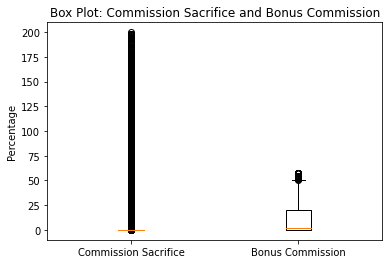

In [13]:
# Create a box plot for CommissionSacrificePercentage and BonusCommissionPercentage
plt.boxplot([df['CommissionSacrificePercentage'], df['BonusCommissionPercentage']])
plt.xticks([1, 2], ['Commission Sacrifice', 'Bonus Commission'])
plt.ylabel('Percentage')
plt.title('Box Plot: Commission Sacrifice and Bonus Commission')
plt.show()

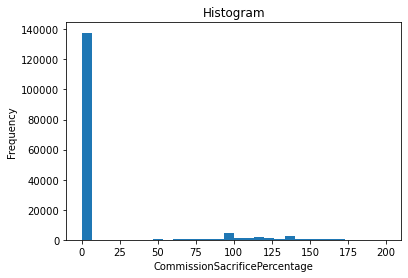

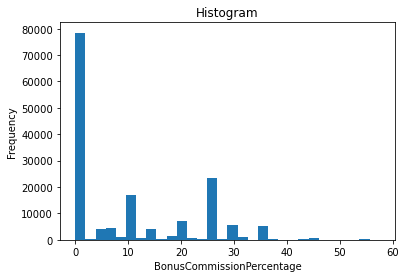

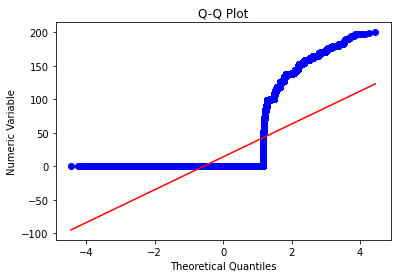

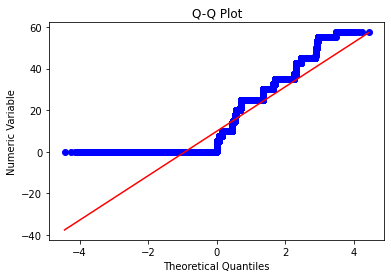

In [14]:
# Visual inspection - Histogram
for column in numeric_data:
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Visual inspection - Q-Q plot
for column in numeric_data:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Numeric Variable')
    plt.title('Q-Q Plot')
    plt.show()

In [15]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness)

Skewness:
CommissionSacrificePercentage    2.579931
BonusCommissionPercentage        0.883003
dtype: float64


Using domain knowledge, it would have been expected that the numeric variables in the dataset would not have a normal distribution and would be right-skewed, as the majority of values would either be zero or close to zero. Due to this distribution, z-score may not be a suitable method of outlier detection, as it could generate misleading results. It may fail to catch outliers in the distribution's right tail or may wrongly detect data points in the tail as outliers.

It should also be noted, given that this dataset represents all applications over a six year period, the dataset could be deemed to be a population rather than a sample. And if so, the identified outliers could just be regarded as genuine outliers representing real and expected extreme values.

Median Absolute Deviation (MAD) is a robust measure of variability that uses the median rather than the mean as a measure of central tendency. It is less sensitive to high values and can handle skewed distributions better. Outliers are data points that are greater than a given MAD threshold.

Percentile-based approaches require establishing thresholds based on the data distribution's percentiles. Outliers can be identified 99th percentile, for example. Rather than depending on assumptions of normality, this technique allows for consideration of the dataset's individual properties and domain expertise.

#### Median Absolute Deviation (MAD)

In [16]:
# Calculate MAD for each column
mad = numeric_data.mad()

# Choose a threshold multiplier
k = 2

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers_madk2 = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Print the outliers for each column
for column in outliers_madk2.columns:
    print(f"Outliers in column '{column}':")
    print(numeric_data[outliers_madk2[column]][column])
    print()

Outliers in column 'CommissionSacrificePercentage':
10        118.21
11        118.39
17        163.71
18         89.98
19        145.60
           ...  
157254    141.10
157255     99.00
157256    100.00
157260    126.40
157261    126.40
Name: CommissionSacrificePercentage, Length: 18869, dtype: float64

Outliers in column 'BonusCommissionPercentage':
1         25.00
8         25.00
9         35.00
13        25.00
15        25.00
          ...  
157241    31.25
157244    30.00
157247    25.00
157248    25.00
157253    30.00
Name: BonusCommissionPercentage, Length: 37405, dtype: float64



In [17]:
# Count the number of outliers in each column
outlier_counts = outliers_madk2.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage          18869
1      BonusCommissionPercentage          37405


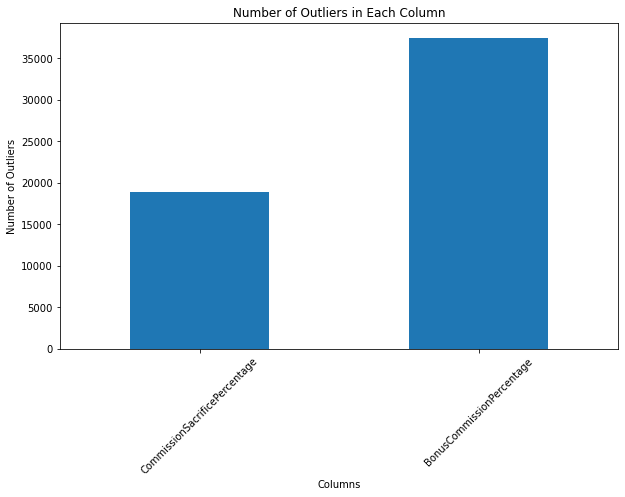

In [18]:
# Count the number of outliers in each column
outlier_counts = outliers_madk2.sum()

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
outlier_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])
mad = numeric_data.mad()

# Choose a threshold multiplier
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers_madk3 = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Print the outliers for each column
for column in outliers_madk3.columns:
    print(f"Outliers in column '{column}':")
    print(numeric_data[outliers_madk3[column]][column])
    print()  # Add a blank line for readability

Outliers in column 'CommissionSacrificePercentage':
10        118.21
11        118.39
17        163.71
18         89.98
19        145.60
           ...  
157254    141.10
157255     99.00
157256    100.00
157260    126.40
157261    126.40
Name: CommissionSacrificePercentage, Length: 17752, dtype: float64

Outliers in column 'BonusCommissionPercentage':
9         35.00
30        35.00
50        35.00
61        35.00
79        35.00
          ...  
157129    35.00
157140    35.00
157141    35.00
157158    36.02
157174    35.00
Name: BonusCommissionPercentage, Length: 7117, dtype: float64



In [20]:
# Count the number of outliers in each column
outlier_counts = outliers_madk3.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage          17752
1      BonusCommissionPercentage           7117


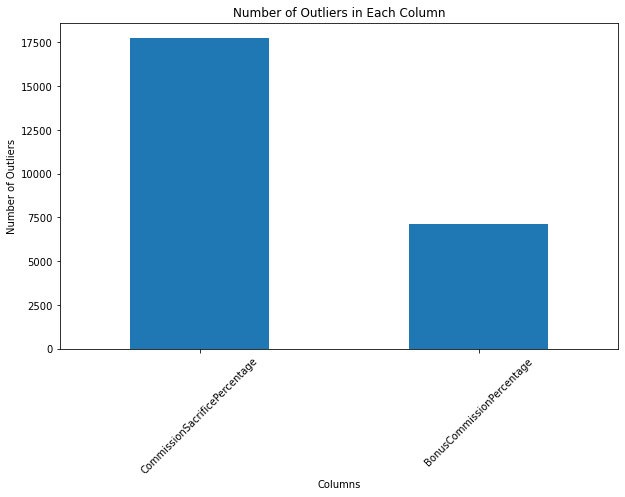

In [21]:
# Count the number of outliers in each column
outlier_counts = outliers_madk3.sum()

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
outlier_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Column')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Define a list of k values to test
k_values = [3,2,1.5, 1.3, 1.2, 1.1]

# Iterate over k values
for k in k_values:
    # Select numeric columns
    numeric_data = df.select_dtypes(include=[np.number])
    mad = numeric_data.mad()
    # Calculate the threshold value
    threshold = k * mad
    
    # Identify outliers
    outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)
    
    # Count the number of outliers in each column
    num_outliers = outliers.sum()
    
    # Print the number of outliers for each column
    print(f"Outliers for k = {k}:")
    print(num_outliers)
    print()  # Add a blank line for readability

Outliers for k = 3:
CommissionSacrificePercentage    17752
BonusCommissionPercentage         7117
dtype: int64

Outliers for k = 2:
CommissionSacrificePercentage    18869
BonusCommissionPercentage        37405
dtype: int64

Outliers for k = 1.5:
CommissionSacrificePercentage    19079
BonusCommissionPercentage        45557
dtype: int64

Outliers for k = 1.3:
CommissionSacrificePercentage    19199
BonusCommissionPercentage        46990
dtype: int64

Outliers for k = 1.2:
CommissionSacrificePercentage    19224
BonusCommissionPercentage        50617
dtype: int64

Outliers for k = 1.1:
CommissionSacrificePercentage    19240
BonusCommissionPercentage        51201
dtype: int64



In [23]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])
mad = numeric_data.mad()
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers_madk3 = (np.abs(numeric_data - numeric_data.median()) > threshold)
# Count the number of outliers in each column
num_outliers = outliers_madk3.sum()
    
# Print the number of outliers for each column
print(f"Outliers for k = {k}:")
print(num_outliers)
print()  # Add a blank line for readability

Outliers for k = 3:
CommissionSacrificePercentage    17752
BonusCommissionPercentage         7117
dtype: int64



#### Impact of MAD outliers:

MAD k = 3

Descriptive statistics for  data both with and without the outliers

Calculate basic descriptive statistics data both with and without the outliers in order to assess impact of the outliers

In [24]:
# Create two datasets (one with outliers included and another with outliers removed)
dataset_with_outliers = df.copy()  # Dataset with outliers included
# dataset_without_outliers = df[~df.isin(outliers)].dropna()  # Dataset with outliers removed
dataset_without_outliers_madk3 = df[~outliers_madk3.any(axis=1)]

In [25]:
# Descriptive statistics for dataset with outliers
statistics_with_outliers = dataset_with_outliers.describe()

In [26]:
# Descriptive statistics for dataset without outliers
statistics_without_outliers_madk3 = dataset_without_outliers_madk3.describe()

In [27]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)

print("\nWithout Outliers:")
print(statistics_without_outliers_madk3)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  132450.000000              132450.000000
mean                        0.676996                   7.926820
std                         6.284107                  10.240312
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

In [28]:
# Select numeric columns
numeric_data = dataset_without_outliers_madk3.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness_madk3 = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness_madk3)

Skewness:
CommissionSacrificePercentage    9.753039
BonusCommissionPercentage        0.869892
dtype: float64


The statistics indicate that the presence of outliers significantly affects the central tendency, dispersion, and range of the variables. Given the substantial differences between the statistics with and without outliers, it suggests that outliers have a notable impact on the overall distribution and summary characteristics of the variables.

#### Visualise impact of MAD outliers

Box Plots

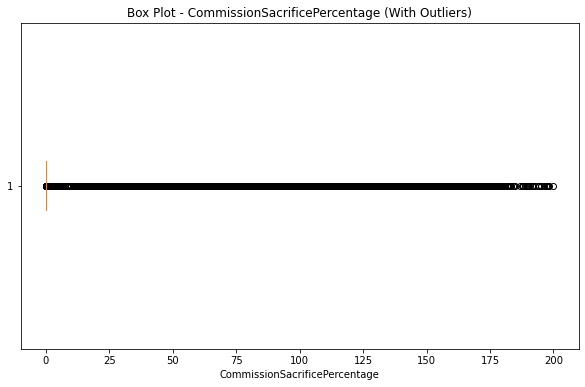

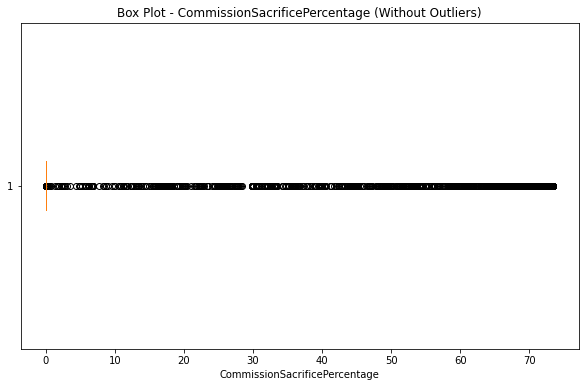

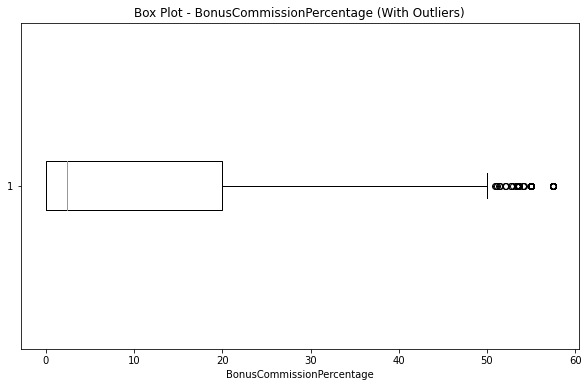

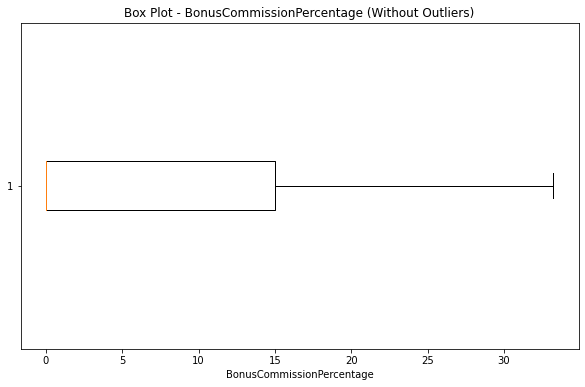

In [29]:
# Create a list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns

# Loop over each numeric column and create box plots
for column in numeric_columns:
    # Box plot with outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Box plot without outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset_without_outliers_madk3[column], vert=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

Histograms

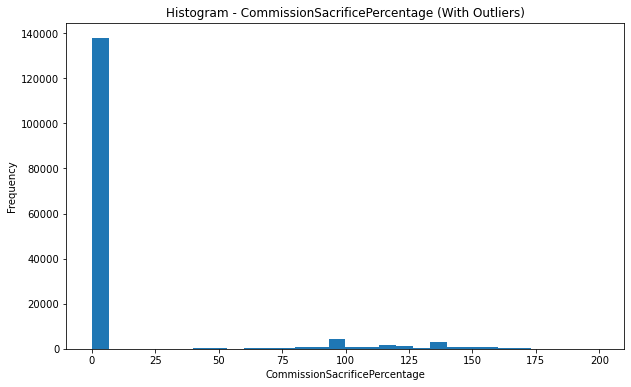

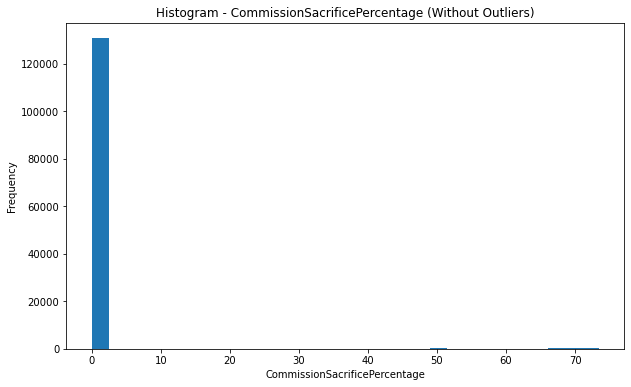

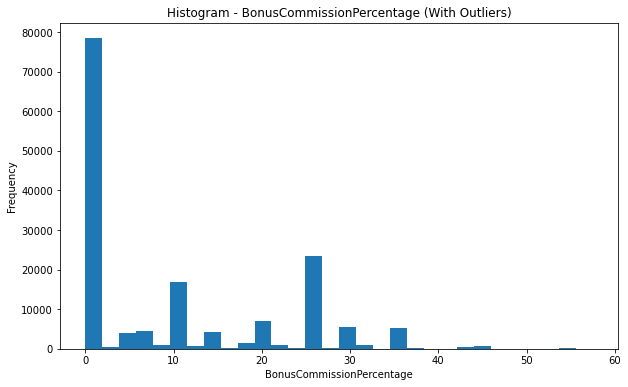

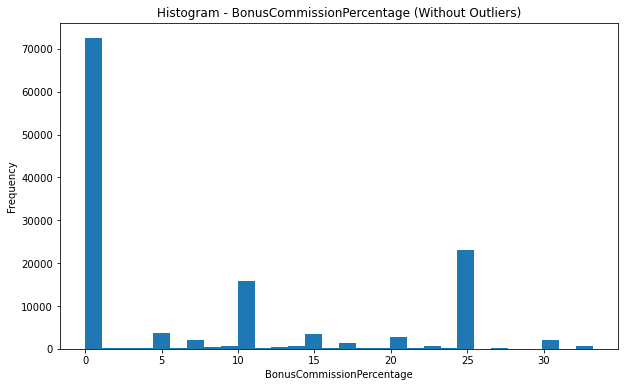

In [30]:
# Loop over each numeric column and create histograms
for column in numeric_columns:
    # Histogram with outliers
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram - {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Histogram without outliers
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_without_outliers_madk3[column], bins=30)
    plt.title(f'Histogram - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Violin Plots

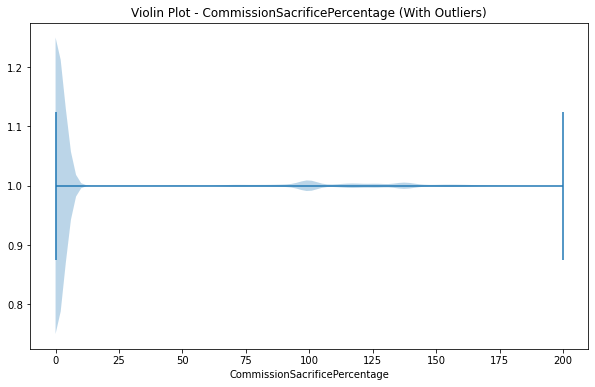

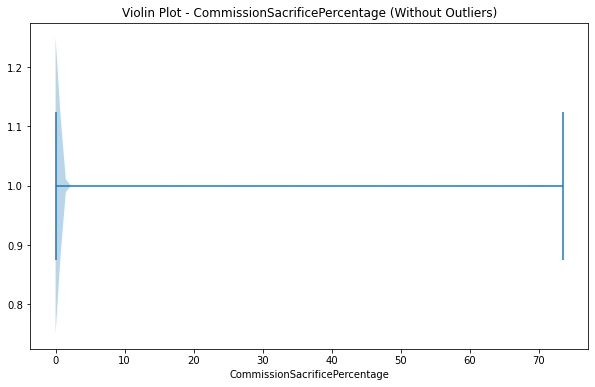

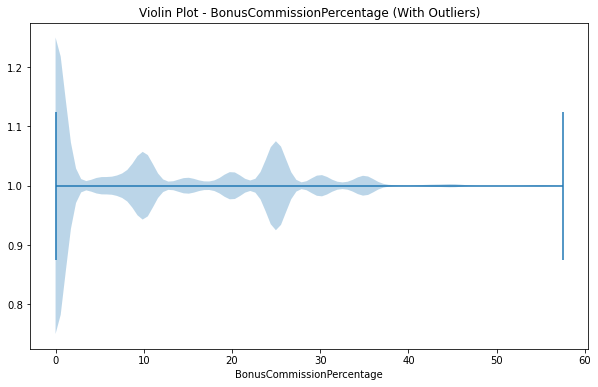

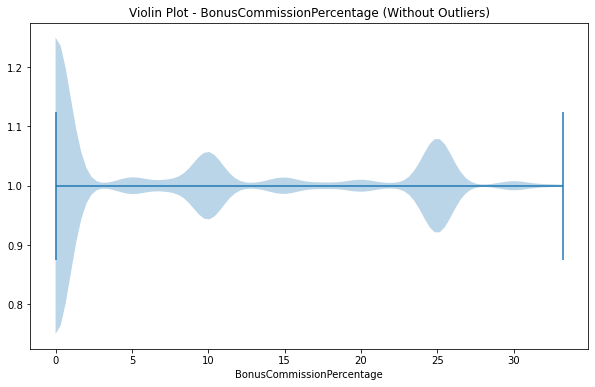

In [31]:
# Loop over each numeric column and create violin plots
for column in numeric_columns:
    # Violin plot with outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(df[column], vert=False)
    plt.title(f'Violin Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Violin plot without outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(dataset_without_outliers_madk3[column], vert=False)
    plt.title(f'Violin Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

#### Correlation Analysis

In [32]:
# Compute correlation matrix with outliers
correlation_matrix_with_outliers = df.corr(method='spearman')  # Using spearman over pearson as it is more robust with the presence of outliers

# Compute correlation matrix without outliers
correlation_matrix_without_outliers_madk3 = dataset_without_outliers_madk3.corr(method='spearman')

# Compare the correlation matrices
correlation_diff_madk3 = correlation_matrix_with_outliers - correlation_matrix_without_outliers_madk3

# Print correlation matrix with outliers
print("Correlation Matrix - With Outliers:")
print(correlation_matrix_with_outliers)

# Print correlation matrix without outliers
print("\nCorrelation Matrix - Without Outliers:")
print(correlation_matrix_without_outliers_madk3)

# Print the difference in correlation matrices
print("\nDifference in Correlation Matrices:")
print(correlation_diff_madk3)

Correlation Matrix - With Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.104362   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.104362  
BonusCommissionPercentage                       1.000000  

Correlation Matrix - Without Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                          -0.034121   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                  -0.034121  
BonusCommissionPercentage                       1.000000  

Difference in Correlation Matrices:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       0.000000   
BonusCommissionPerc

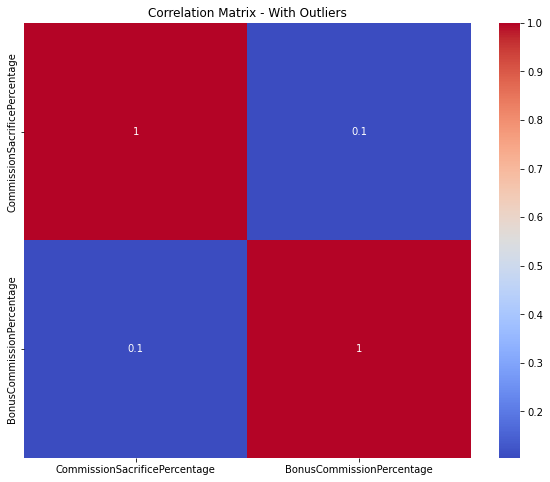

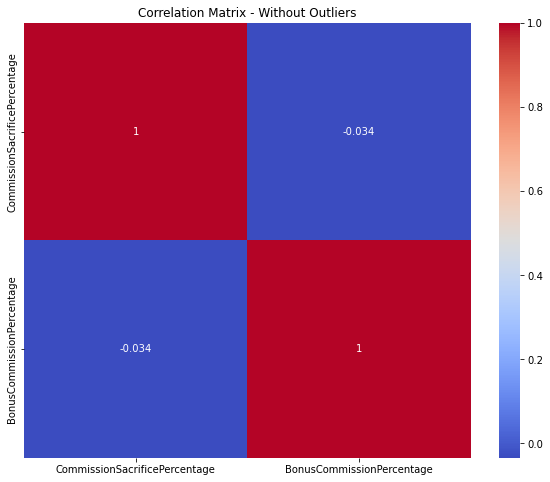

In [33]:
# Heatmap with outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - With Outliers')
plt.show()

# Heatmap without outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_outliers_madk3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Without Outliers')
plt.show()

The disparity in correlation values indicates that the outliers may have influenced the correlation relationship between the variables. By removing the outliers, the positive connection between the two variables became greater.

#### T-Tests

Perform a t-test to assess if the means of the two subsets (with outliers vs without outliers) differ significantly.

In [34]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_madk3 = dataset_without_outliers_madk3[column][dataset_without_outliers_madk3[column].notnull()]
    
    # Perform t-test
    t_statistic_madk3, p_value_madk3 = ttest_ind(data_with_outliers, data_without_outliers_madk3)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_madk3}")
    print(f"P-Value: {p_value_madk3}")
    print()


T-Test Results for CommissionSacrificePercentage:
T-Statistic: 123.94514587740485
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 46.74180907112588
P-Value: 0.0



The t-tests indicate very low p-values (0.0) for both the CommissionSacrificePercentage and BonusCommissionPercentage columns. This suggests strong evidence against the null hypothesis that the means of the two datasets are equal. Therefore, it can be said that there is a significant difference in the means between the datasets with outliers and without outliers for both columns, meaning that the outliers are having a significant impact on the dataset.

Overall, the presence of outliers affects the mean and std of the data. Outliers can also influence the relationships between variables, as seen in the correlation analysis. The t-test results confirm that the presence of outliers significantly impacts the statistical differences between the subsets.

MAD k = 2

In [35]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])
mad = numeric_data.mad()
k = 2

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers_madk2 = (np.abs(numeric_data - numeric_data.median()) > threshold)
# Count the number of outliers in each column
num_outliers = outliers_madk2.sum()
    
# Print the number of outliers for each column
print(f"Outliers for k = {k}:")
print(num_outliers)
print()  # Add a blank line for readability

Outliers for k = 2:
CommissionSacrificePercentage    18869
BonusCommissionPercentage        37405
dtype: int64



In [36]:
# Create two datasets (one with outliers included and another with outliers removed)
dataset_with_outliers = df.copy()  # Dataset with outliers included

# dataset_without_outliers = df[~df.isin(outliers)].dropna()  # Dataset with outliers removed
dataset_without_outliers_madk2 = df[~outliers_madk2.any(axis=1)]

# Descriptive statistics for dataset with outliers
statistics_with_outliers = dataset_with_outliers.describe()

# Descriptive statistics for dataset without outliers
statistics_without_outliers_madk2 = dataset_without_outliers_madk2.describe()

# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_madk2)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  105230.000000              105230.000000
mean                        0.128305                   3.582152
std                         2.086721                   5.828782
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

In [37]:
# Select numeric columns
numeric_data = dataset_without_outliers_madk2.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness_madk2 = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness_madk2)

Skewness:
CommissionSacrificePercentage    17.621855
BonusCommissionPercentage         1.430364
dtype: float64


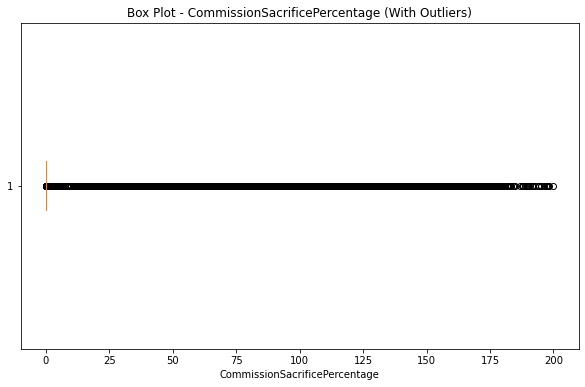

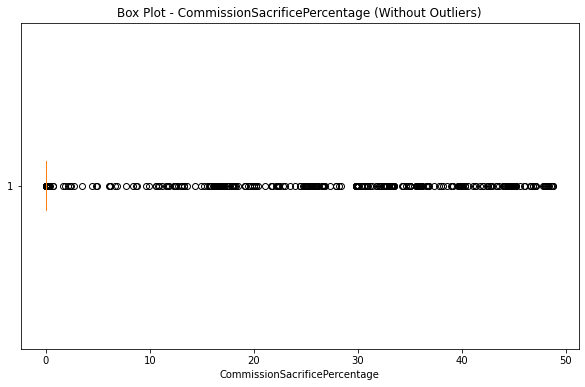

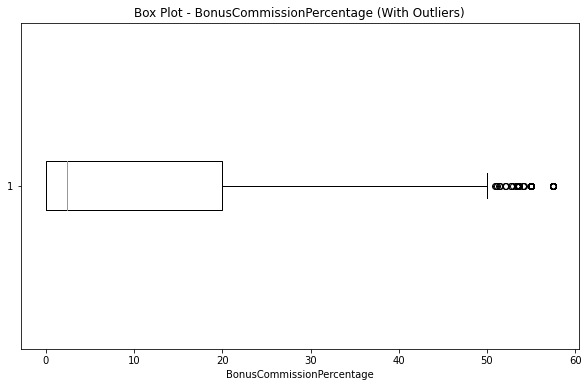

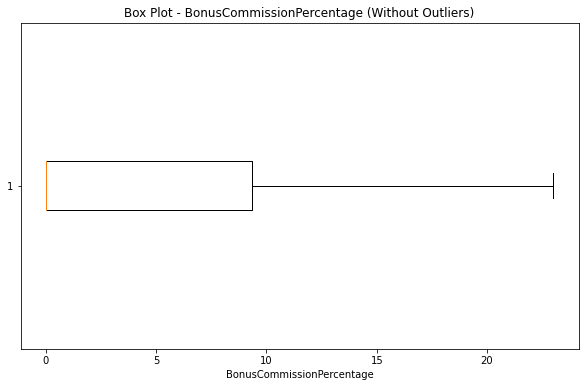

In [38]:
# Create a list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns

# Loop over each numeric column and create box plots
for column in numeric_columns:
    # Box plot with outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Box plot without outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset_without_outliers_madk2[column], vert=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

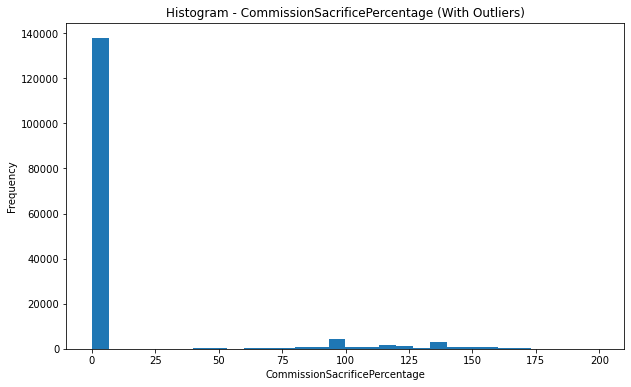

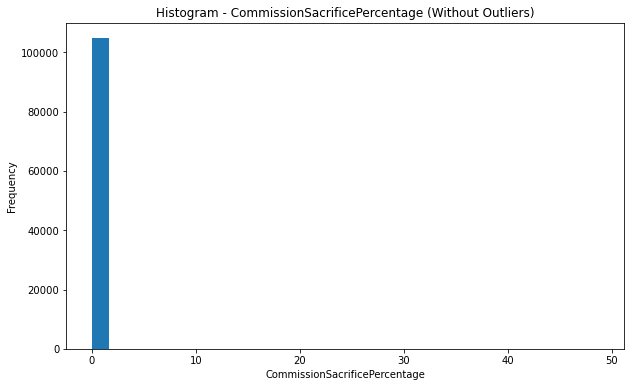

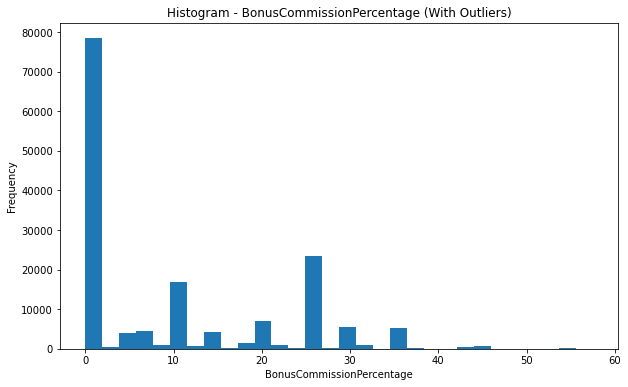

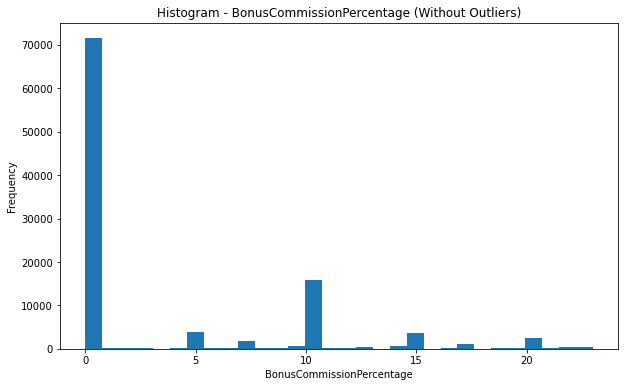

In [39]:
# Loop over each numeric column and create histograms
for column in numeric_columns:
    # Histogram with outliers
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram - {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Histogram without outliers
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_without_outliers_madk2[column], bins=30)
    plt.title(f'Histogram - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

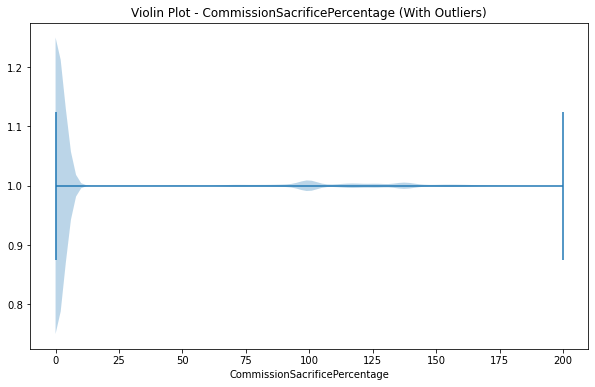

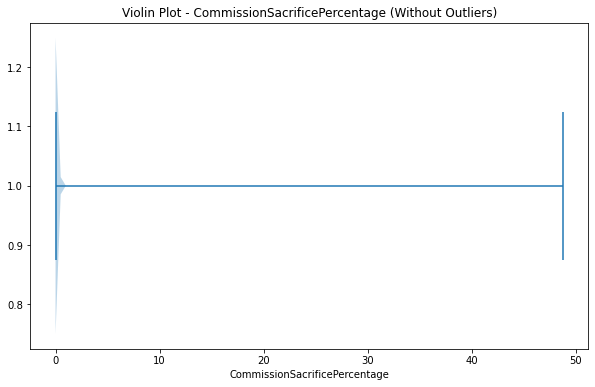

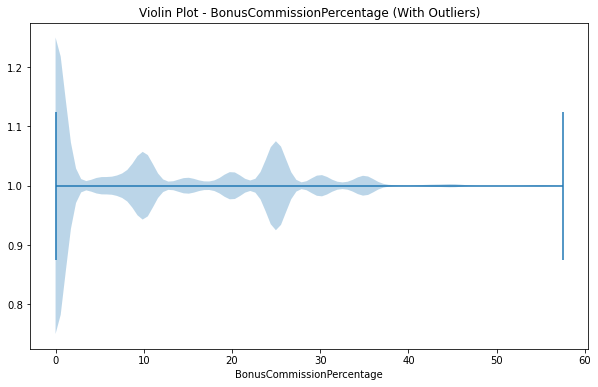

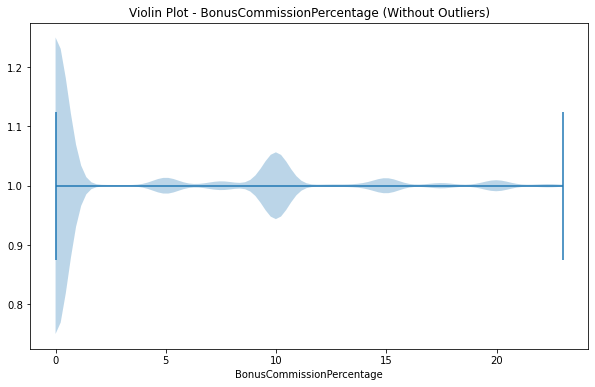

In [40]:
# Loop over each numeric column and create violin plots
for column in numeric_columns:
    # Violin plot with outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(df[column], vert=False)
    plt.title(f'Violin Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Violin plot without outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(dataset_without_outliers_madk2[column], vert=False)
    plt.title(f'Violin Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

In [41]:
# Compute correlation matrix with outliers
correlation_matrix_with_outliers = df.corr(method='spearman')  # Using spearman over pearson as it is more robust with the presence of outliers

# Compute correlation matrix without outliers
correlation_matrix_without_outliers_madk2 = dataset_without_outliers_madk2.corr(method='spearman')

# Compare the correlation matrices
correlation_diff_madk2 = correlation_matrix_with_outliers - correlation_matrix_without_outliers_madk2

# Print correlation matrix with outliers
print("Correlation Matrix - With Outliers:")
print(correlation_matrix_with_outliers)

# Print correlation matrix without outliers
print("\nCorrelation Matrix - Without Outliers:")
print(correlation_matrix_without_outliers_madk2)

# Print the difference in correlation matrices
print("\nDifference in Correlation Matrices:")
print(correlation_diff_madk2)

Correlation Matrix - With Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.104362   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.104362  
BonusCommissionPercentage                       1.000000  

Correlation Matrix - Without Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                          -0.018582   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                  -0.018582  
BonusCommissionPercentage                       1.000000  

Difference in Correlation Matrices:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       0.000000   
BonusCommissionPerc

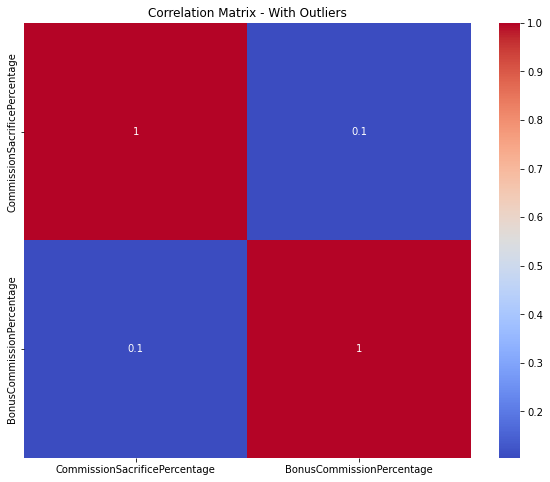

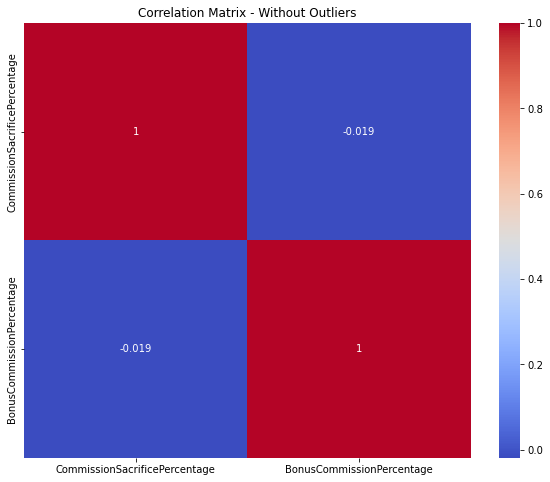

In [42]:
# Heatmap with outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - With Outliers')
plt.show()

# Heatmap without outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_outliers_madk2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Without Outliers')
plt.show()

In [43]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_madk2 = dataset_without_outliers_madk2[column][dataset_without_outliers_madk2[column].notnull()]
    
    # Perform t-test
    t_statistic_madk2, p_value_madk2 = ttest_ind(data_with_outliers, data_without_outliers_madk2)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_madk2}")
    print(f"P-Value: {p_value_madk2}")
    print()


T-Test Results for CommissionSacrificePercentage:
T-Statistic: 116.19570249792581
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 158.17144495739382
P-Value: 0.0



Based on the t-test findings, both CommissionSacrificePercentage and BonusCommissionPercentage appear to have statistically significant variations from their respective reference values.

#### Percentile Approach to outlier Identification

In [44]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Choose the percentile
percentile = 95

# Calculate the threshold for each column
threshold = numeric_data.quantile(percentile / 100)

# Identify outliers
outliers_95pc = numeric_data > threshold

# Count the number of outliers for each column
outliers_count = outliers_95pc.sum()

# Print the number of outliers for each column
for column in outliers_count.index:
    print(f"Number of outliers in column '{column}': {outliers_count[column]}")

Number of outliers in column 'CommissionSacrificePercentage': 7861
Number of outliers in column 'BonusCommissionPercentage': 7150


In [45]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Choose the percentile
percentile = 99

# Calculate the threshold for each column
threshold = numeric_data.quantile(percentile / 100)

# Identify outliers
outliers_99pc = numeric_data > threshold

# Count the number of outliers for each column
outliers_count = outliers_99pc.sum()

# Print the number of outliers for each column
for column in outliers_count.index:
    print(f"Number of outliers in column '{column}': {outliers_count[column]}")

Number of outliers in column 'CommissionSacrificePercentage': 1571
Number of outliers in column 'BonusCommissionPercentage': 1137


Using the percentile approach identifies significantly less outliers. This could ensure that only the most extreme values are identified as outlier, which may a valid approach given that, as this could be considered a population dataset rather than a sample dataset, even the outliers are likely to be genuine values.

Impact of 99th Percetile Approach:

In [46]:
# Create two datasets (one with outliers included and another with outliers removed)
dataset_with_outliers = df.copy()  # Dataset with outliers included
# dataset_without_outliers = df[~df.isin(outliers)].dropna()  # Dataset with outliers removed
dataset_without_outliers_99pc = df[~outliers_99pc.any(axis=1)]

In [47]:
# Descriptive statistics for dataset with outliers
statistics_with_outliers = dataset_with_outliers.describe()

# Descriptive statistics for dataset without outliers

statistics_without_outliers_99pc = dataset_without_outliers_99pc.describe()

# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_99pc)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                   154559.00000              154559.000000
mean                        12.54015                   9.537162
std                         35.84411                  11.586846
min                          0.00000                   0.000000
25%                          0.00000                   0.000000
50%   

Outliers have a substantial impact on the summary statistics of CommissionSacrificePercentage and BonusCommissionPercentage, notably the mean and standard deviation. When outliers are eliminated from the data, the central tendency and variability appear to be reduced. 

In [48]:
# Select numeric columns
numeric_data = dataset_without_outliers_99pc.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness_99pc = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness_99pc)

Skewness:
CommissionSacrificePercentage    2.654586
BonusCommissionPercentage        0.811976
dtype: float64


Both variables have positive skewness, suggesting that the data is not distributed symmetrically. The skewness values indicate that the distributions may have a rightward tail, which might be produced by outliers or a concentration of data at the lower end.

Box Plots

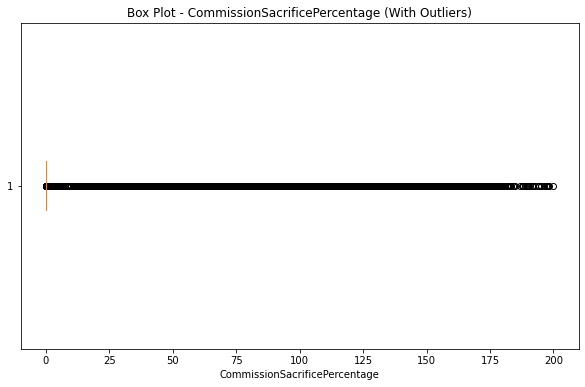

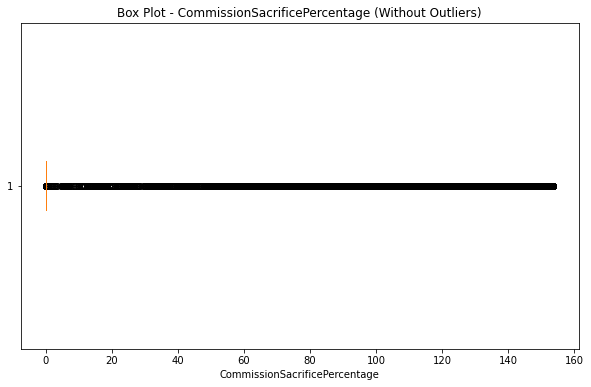

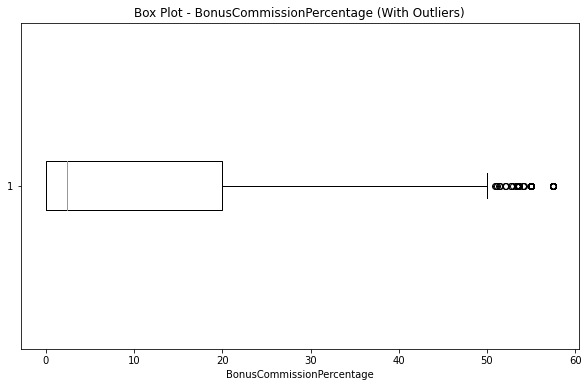

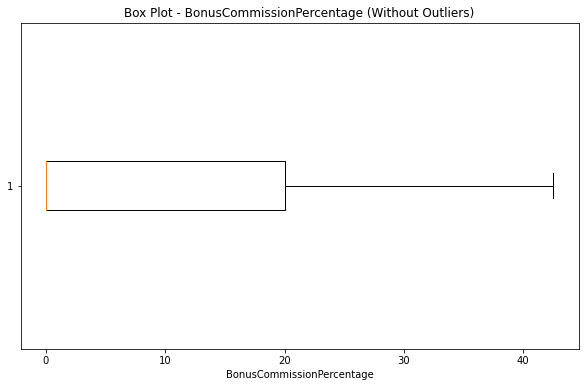

In [49]:
# Create a list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns

# Loop over each numeric column and create box plots
for column in numeric_columns:
    # Box plot with outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Box plot without outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset_without_outliers_99pc[column], vert=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

Histograms

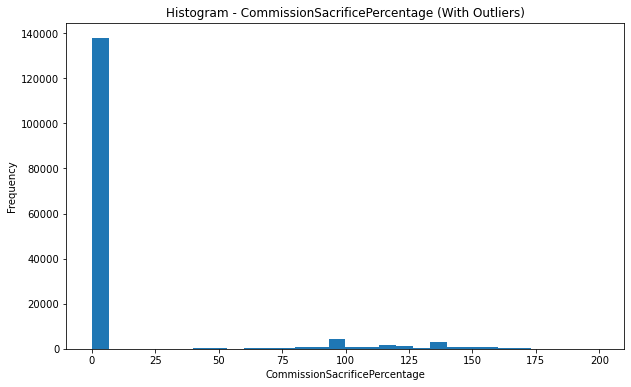

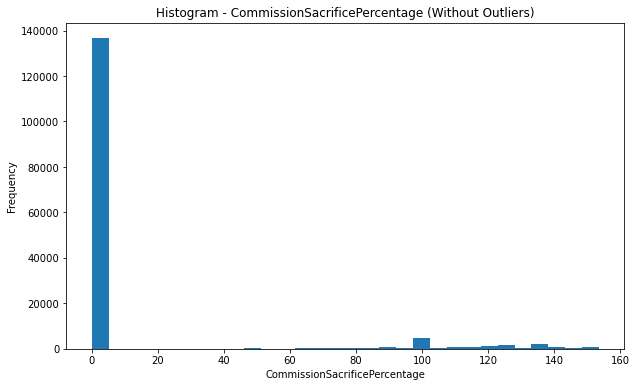

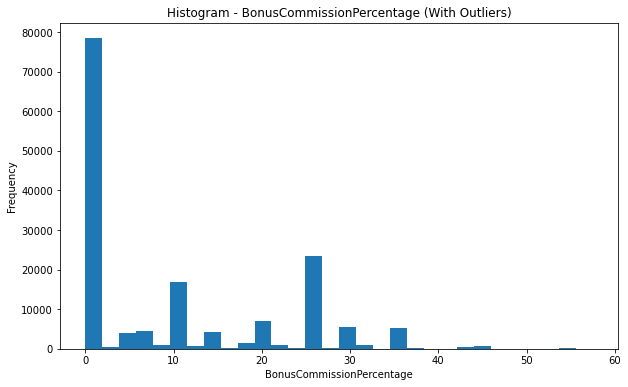

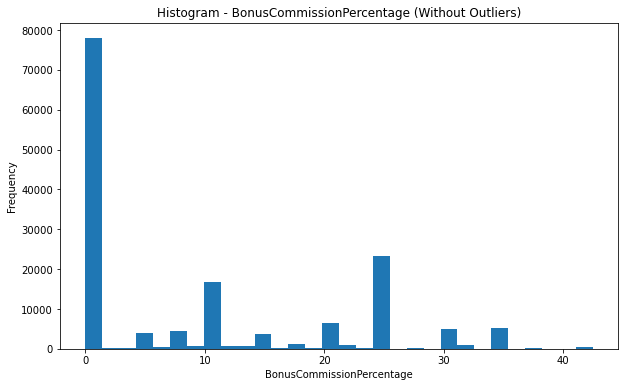

In [50]:
# Loop over each numeric column and create histograms
for column in numeric_columns:
    # Histogram with outliers
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram - {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Histogram without outliers
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_without_outliers_99pc[column], bins=30)
    plt.title(f'Histogram - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Violin Plots

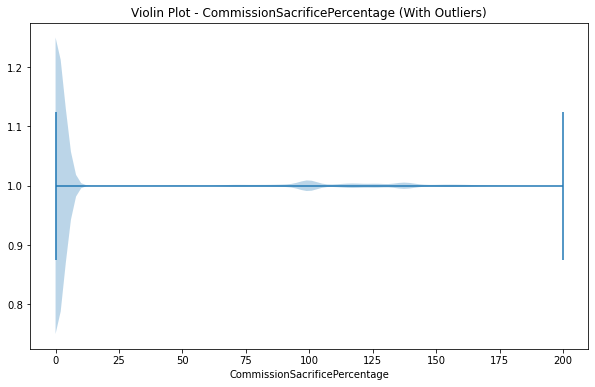

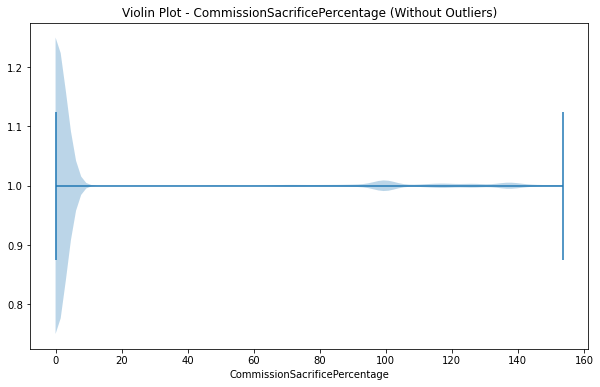

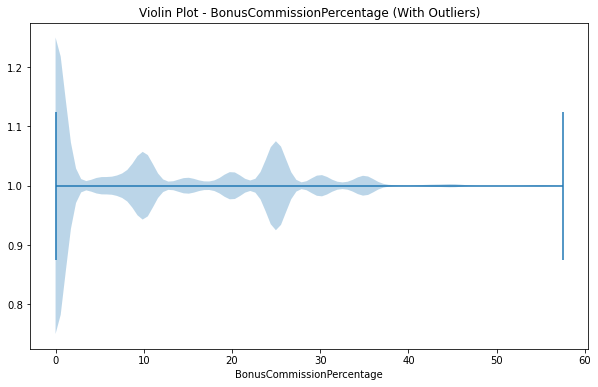

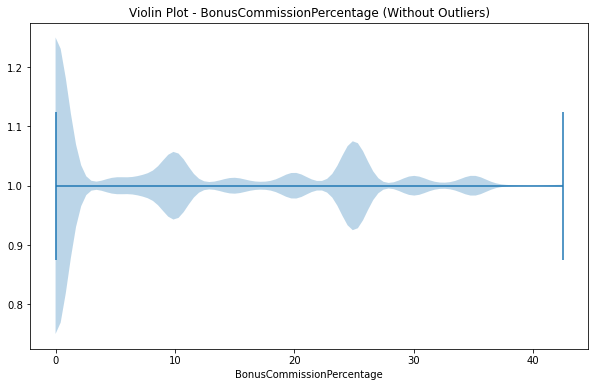

In [51]:
# Loop over each numeric column and create violin plots
for column in numeric_columns:
    # Violin plot with outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(df[column], vert=False)
    plt.title(f'Violin Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Violin plot without outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(dataset_without_outliers_99pc[column], vert=False)
    plt.title(f'Violin Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

#### Correlation Analysis

In [52]:
# Compute correlation matrix with outliers
correlation_matrix_with_outliers = df.corr(method='spearman')  # Using spearman over pearson as it is more robust with the presence of outliers

# Compute correlation matrix without outliers
correlation_matrix_without_outliers_99pc = dataset_without_outliers_99pc.corr(method='spearman')

# Compare the correlation matrices
correlation_diff_99pc = correlation_matrix_with_outliers - correlation_matrix_without_outliers_99pc

# Print correlation matrix with outliers
print("Correlation Matrix - With Outliers:")
print(correlation_matrix_with_outliers)

# Print correlation matrix without outliers
print("\nCorrelation Matrix - Without Outliers:")
print(correlation_matrix_without_outliers_99pc)

# Print the difference in correlation matrices
print("\nDifference in Correlation Matrices:")
print(correlation_diff_99pc)

Correlation Matrix - With Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.104362   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.104362  
BonusCommissionPercentage                       1.000000  

Correlation Matrix - Without Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.096859   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.096859  
BonusCommissionPercentage                       1.000000  

Difference in Correlation Matrices:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       0.000000   
BonusCommissionPerc

Both with and without outliers, there is a positive but weak relationship between CommissionSacrificePercentage and BonusCommissionPercentage. The removal of outliers has no discernible effect on the strength or direction of this association. It implies that there is a little positive link between these two variables, but it is not a substantial one.

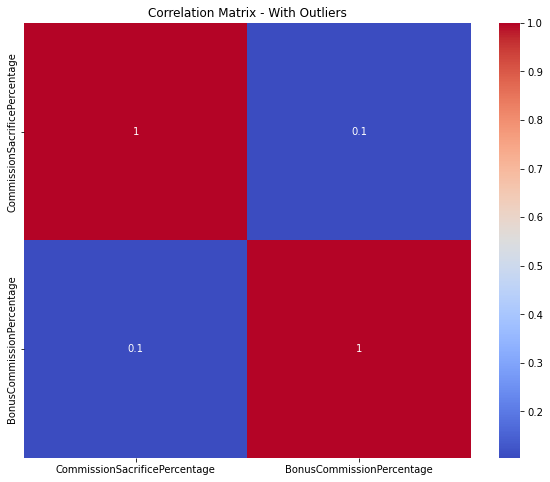

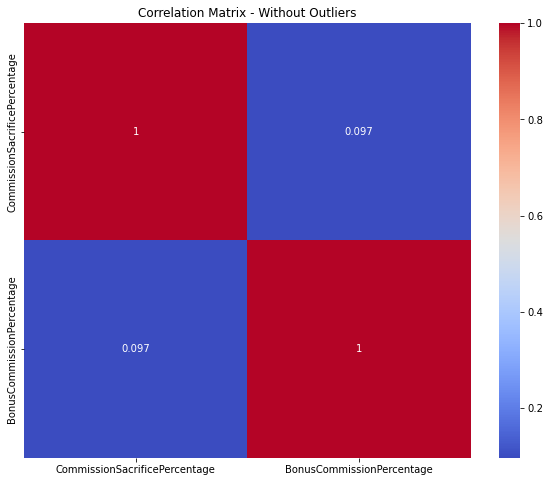

In [53]:
# Heatmap with outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - With Outliers')
plt.show()

# Heatmap without outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_outliers_99pc, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Without Outliers')
plt.show()

#### T-Test

In [54]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_99pc = dataset_without_outliers_99pc[column][dataset_without_outliers_99pc[column].notnull()]
    
    # Perform t-test
    t_statistic_99pc, p_value_99pc = ttest_ind(data_with_outliers, data_without_outliers_99pc)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_99pc}")
    print(f"P-Value: {p_value_99pc}")
    print()


T-Test Results for CommissionSacrificePercentage:
T-Statistic: 10.779046854577599
P-Value: 4.371269938352842e-27

T-Test Results for BonusCommissionPercentage:
T-Statistic: 8.253844913681409
P-Value: 1.5396677148917055e-16



The low p-values in both cases suggest that there is substantial evidence to support the alternative hypothesis, implying that there is a significant difference between the sample means and the assumed population mean for both CommissionSacrificePercentage and BonusCommissionPercentage. These findings indicate that the means of these two variables differ statistically significantly.

Impact of 95th Percetile Approach:

In [55]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Choose the percentile
percentile = 95

# Calculate the threshold for each column
threshold = numeric_data.quantile(percentile / 100)

# Identify outliers
outliers_95pc = numeric_data > threshold

# Count the number of outliers for each column
outliers_count = outliers_95pc.sum()

# Print the number of outliers for each column
for column in outliers_count.index:
    print(f"Number of outliers in column '{column}': {outliers_count[column]}")

Number of outliers in column 'CommissionSacrificePercentage': 7861
Number of outliers in column 'BonusCommissionPercentage': 7150


In [56]:
# Create two datasets (one with outliers included and another with outliers removed)
dataset_with_outliers = df.copy()  # Dataset with outliers included
# dataset_without_outliers = df[~df.isin(outliers)].dropna()  # Dataset with outliers removed
dataset_without_outliers_95pc = df[~outliers_95pc.any(axis=1)]

In [57]:
# Descriptive statistics for dataset with outliers
statistics_with_outliers = dataset_with_outliers.describe()

# Descriptive statistics for dataset without outliers

statistics_without_outliers_95pc = dataset_without_outliers_95pc.describe()

# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_95pc)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  142283.000000              142283.000000
mean                        7.607648                   8.183430
std                        26.271401                  10.252882
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

The existence of outliers has a considerable impact on the summary statistics but has no effect on the overall weak positive correlation between the two variables. Both CommissionSacrificePercentage and BonusCommissionPercentage have statistically significant variances in means, indicating that these variables are not centered around the reference value. The existence of outliers or a concentration of data at the lower end of the distribution is indicated by positive skewness.

In [58]:
# Select numeric columns
numeric_data = dataset_without_outliers_95pc.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness_95pc = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness_95pc)

Skewness:
CommissionSacrificePercentage    3.274197
BonusCommissionPercentage        0.823289
dtype: float64


CommissionSacrificePercentage is substantially right-skewed, suggesting a high concentration of data at the lower end and the occurrence of extreme values or outliers on the right. BonusCommissionPercentage likewise has a right-skewed distribution, but it is less severe than CommissionSacrificePercentage.

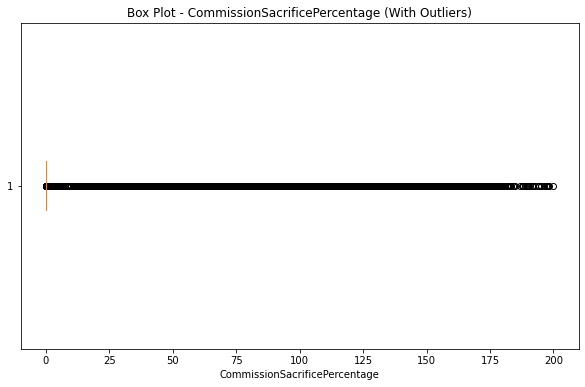

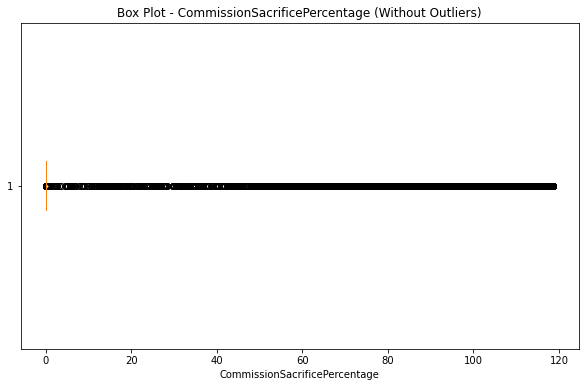

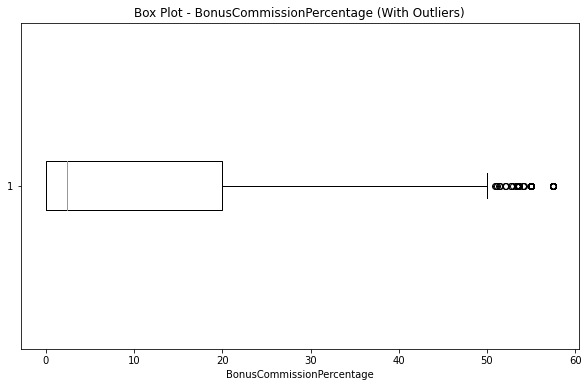

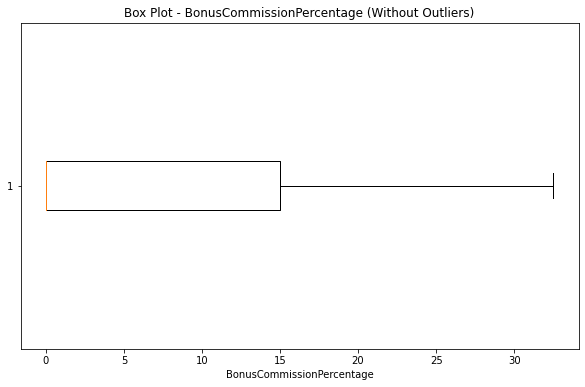

In [59]:
# Create a list of numeric column names
numeric_columns = df.select_dtypes(include='number').columns

# Loop over each numeric column and create box plots
for column in numeric_columns:
    # Box plot with outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Box plot without outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset_without_outliers_95pc[column], vert=False)
    plt.title(f'Box Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

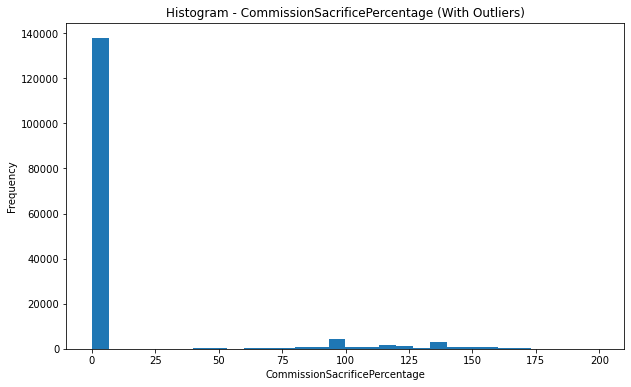

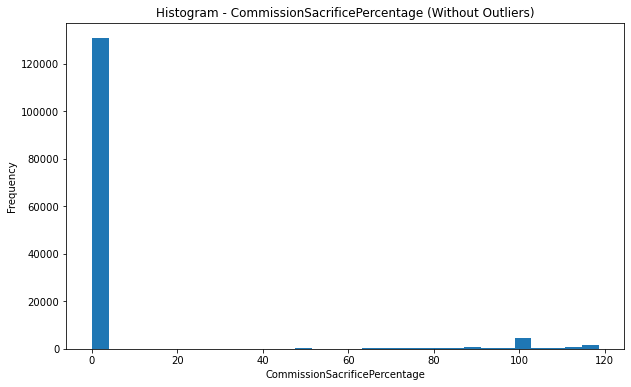

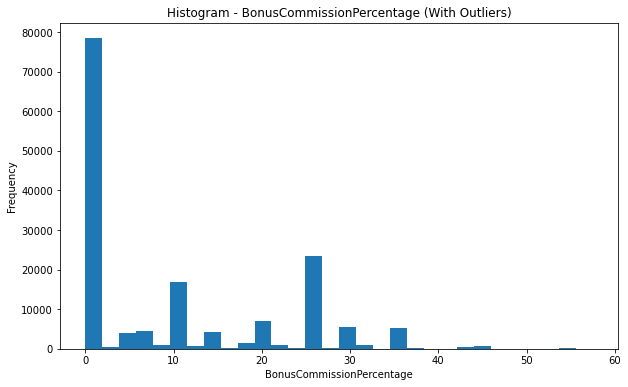

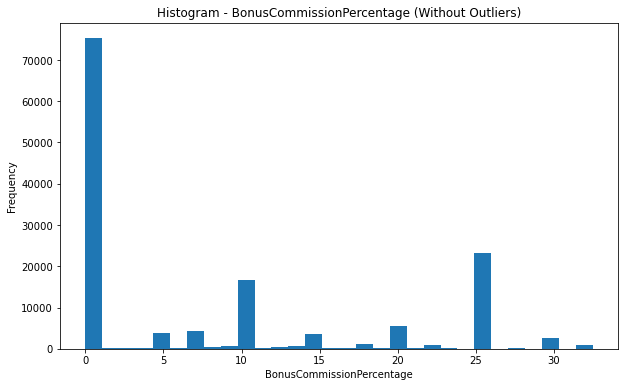

In [60]:
# Loop over each numeric column and create histograms
for column in numeric_columns:
    # Histogram with outliers
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f'Histogram - {column} (With Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Histogram without outliers
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_without_outliers_95pc[column], bins=30)
    plt.title(f'Histogram - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

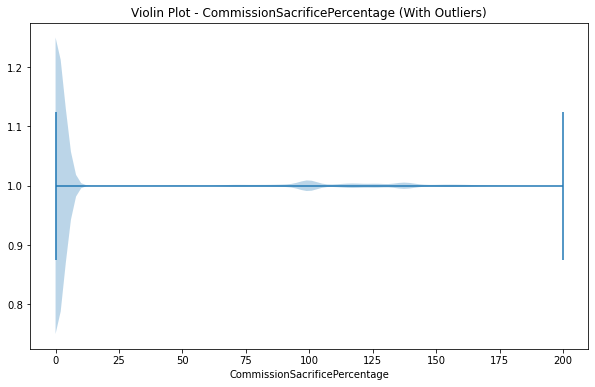

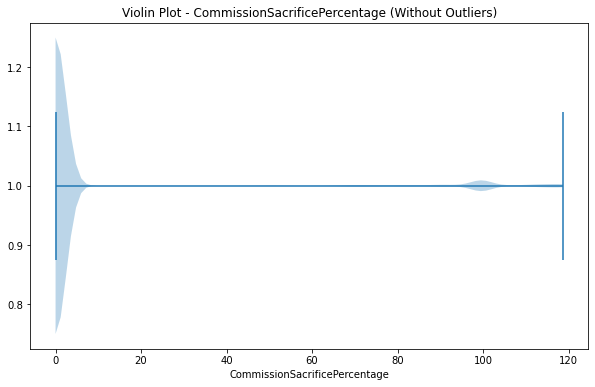

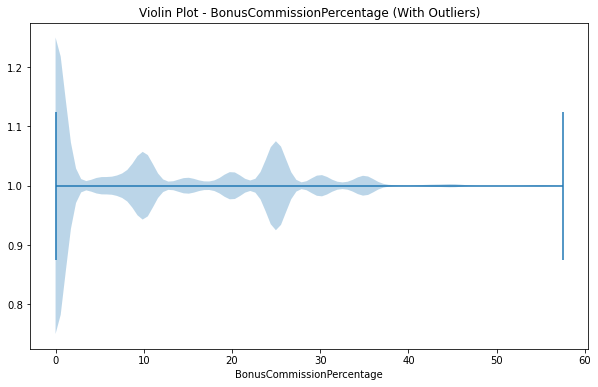

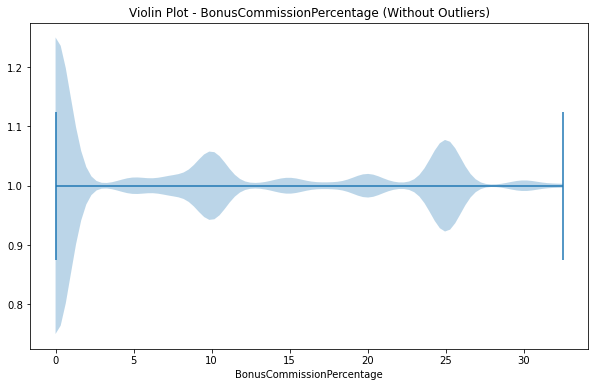

In [61]:
# Loop over each numeric column and create violin plots
for column in numeric_columns:
    # Violin plot with outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(df[column], vert=False)
    plt.title(f'Violin Plot - {column} (With Outliers)')
    plt.xlabel(column)
    plt.show()

    # Violin plot without outliers
    plt.figure(figsize=(10, 6))
    plt.violinplot(dataset_without_outliers_95pc[column], vert=False)
    plt.title(f'Violin Plot - {column} (Without Outliers)')
    plt.xlabel(column)
    plt.show()

In [62]:
# Compute correlation matrix with outliers
correlation_matrix_with_outliers = df.corr(method='spearman')  # Using spearman over pearson as it is more robust with the presence of outliers

# Compute correlation matrix without outliers
correlation_matrix_without_outliers_95pc = dataset_without_outliers_95pc.corr(method='spearman')

# Compare the correlation matrices
correlation_diff_95pc = correlation_matrix_with_outliers - correlation_matrix_without_outliers_95pc

# Print correlation matrix with outliers
print("Correlation Matrix - With Outliers:")
print(correlation_matrix_with_outliers)

# Print correlation matrix without outliers
print("\nCorrelation Matrix - Without Outliers:")
print(correlation_matrix_without_outliers_95pc)

# Print the difference in correlation matrices
print("\nDifference in Correlation Matrices:")
print(correlation_diff_95pc)

Correlation Matrix - With Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.104362   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.104362  
BonusCommissionPercentage                       1.000000  

Correlation Matrix - Without Outliers:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       1.000000   
BonusCommissionPercentage                           0.083759   

                               BonusCommissionPercentage  
CommissionSacrificePercentage                   0.083759  
BonusCommissionPercentage                       1.000000  

Difference in Correlation Matrices:
                               CommissionSacrificePercentage  \
CommissionSacrificePercentage                       0.000000   
BonusCommissionPerc

With and without outliers, there is a positive but somewhat modest association between CommissionSacrificePercentage and BonusCommissionPercentage. Removing outliers weakens the correlation marginally but has no effect on the general direction of the connection. As a result, with or without outliers, the correlation between these two variables appears to be generally constant and positive.

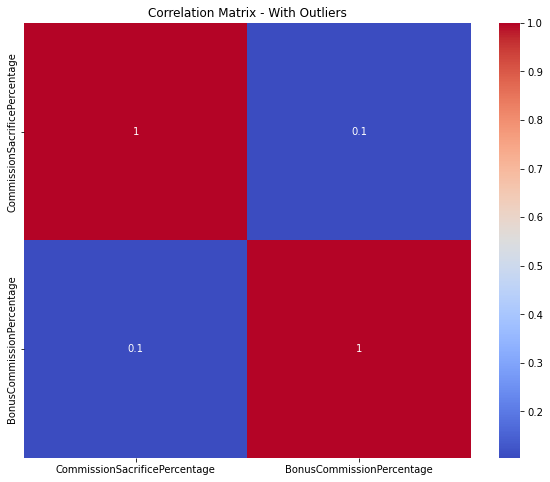

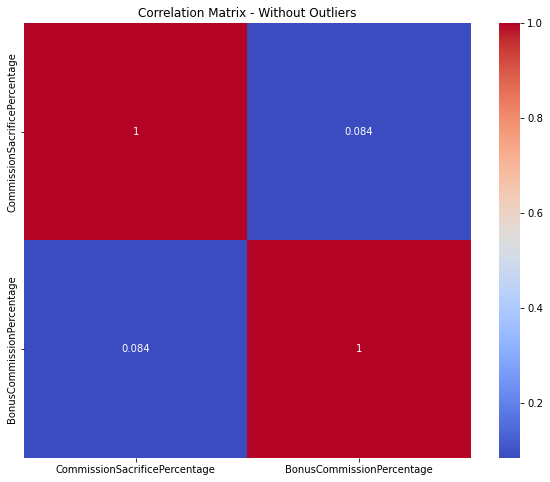

In [63]:
# Heatmap with outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_outliers, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - With Outliers')
plt.show()

# Heatmap without outliers
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_without_outliers_95pc, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Without Outliers')
plt.show()

In [64]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_95pc = dataset_without_outliers_95pc[column][dataset_without_outliers_95pc[column].notnull()]
    
    # Perform t-test
    t_statistic_95pc, p_value_95pc = ttest_ind(data_with_outliers, data_without_outliers_95pc)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_95pc}")
    print(f"P-Value: {p_value_95pc}")
    print()

T-Test Results for CommissionSacrificePercentage:
T-Statistic: 52.2380692735487
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 41.50006479957427
P-Value: 0.0



The low p-values (near zero) in both cases indicate that there is strong evidence to support the alternative hypothesis, implying a significant difference between the sample means and the assumed population mean for both CommissionSacrificePercentage and BonusCommissionPercentage. These findings clearly imply that both variables have means that deviate considerably from the population mean, and the discrepancies are statistically significant.

#### Impact of Outliers at MAD k = 3

In [65]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)

print("\nWithout Outliers:")
print(statistics_without_outliers_madk3)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  132450.000000              132450.000000
mean                        0.676996                   7.926820
std                         6.284107                  10.240312
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

Outliers have a significant influence on the summary statistics for CommissionSacrificePercentage and BonusCommissionPercentage. The removal of outliers leads to much lower means and lesser variability in the data.

In [66]:
# Print the skewness values
print("Skewness:")
print(skewness_madk3)

Skewness:
CommissionSacrificePercentage    9.753039
BonusCommissionPercentage        0.869892
dtype: float64


Skewness data show strong right-skewness in CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is quite high, suggesting a severe concentration of data at the lower end and the existence of extreme values or outliers on the right. BonusCommissionPercentage on the other hand, has less significant skewness.

In [67]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_madk3 = dataset_without_outliers_madk3[column][dataset_without_outliers_madk3[column].notnull()]
    
    # Perform t-test
    t_statistic_madk3, p_value_madk3 = ttest_ind(data_with_outliers, data_without_outliers_madk3)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_madk3}")
    print(f"P-Value: {p_value_madk3}")
    print()

T-Test Results for CommissionSacrificePercentage:
T-Statistic: 123.94514587740485
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 46.74180907112588
P-Value: 0.0



In both cases, the p-values are extremely low (close to zero), implying a significant difference between the sample means and the assumed population mean for both CommissionSacrificePercentage and BonusCommissionPercentage. These findings clearly imply that both variables have means that deviate considerably from the reference value, and the discrepancies are statistically significant.

#### Impact of Outliers at MAD k = 2

In [68]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_madk2)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  105230.000000              105230.000000
mean                        0.128305                   3.582152
std                         2.086721                   5.828782
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

Outliers have a significant influence on the summary statistics for CommissionSacrificePercentage and BonusCommissionPercentage. The removal of outliers leads to much lower means and lesser variability in the data. 

In [69]:
# Print the skewness values
print("Skewness:")
print(skewness_madk2)

Skewness:
CommissionSacrificePercentage    17.621855
BonusCommissionPercentage         1.430364
dtype: float64


In CommissionSacrificePercentage, the skewness values show a severe right-skewness, indicating a concentration of data at the lower end and the occurrence of extreme values or outliers on the right. This skewness is quite high, indicating a significant distortion in the data distribution.

BonusCommissionPercentage has a right-skewed distribution, but it is less severe than CommissionSacrificePercentage. Although there is still a preponderance of data at the lower end, the skewness is less obvious.

In [70]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_madk2 = dataset_without_outliers_madk2[column][dataset_without_outliers_madk2[column].notnull()]
    
    # Perform t-test
    t_statistic_madk2, p_value_madk2 = ttest_ind(data_with_outliers, data_without_outliers_madk2)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_madk2}")
    print(f"P-Value: {p_value_madk2}")
    print()

T-Test Results for CommissionSacrificePercentage:
T-Statistic: 116.19570249792581
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 158.17144495739382
P-Value: 0.0



In both cases, the p-values are extremely low (close to zero), implying a significant difference between the sample means and the assumed population mean for both CommissionSacrificePercentage and BonusCommissionPercentage. These findings clearly imply that both variables have means that deviate considerably from the assumed population mean, and the discrepancies are statistically significant.

#### Impact of Outliers at 99th Percentile

In [71]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_99pc)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                   154559.00000              154559.000000
mean                        12.54015                   9.537162
std                         35.84411                  11.586846
min                          0.00000                   0.000000
25%                          0.00000                   0.000000
50%   

Outliers have a significant influence on the summary statistics for CommissionSacrificePercentage and BonusCommissionPercentage. Outliers are removed, resulting in lower means and less variability in the data. 

In [72]:
# Print the skewness values
print("Skewness:")
print(skewness_99pc)

Skewness:
CommissionSacrificePercentage    2.654586
BonusCommissionPercentage        0.811976
dtype: float64


Skewness values show right-skewed distributions for both CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is more evident than in BonusCommissionPercentage. Both variables show a concentration of data towards the bottom end of their respective distributions, but the skewness is moderate to strong, indicating a moderate to strong skewness pattern.

In [73]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_99pc = dataset_without_outliers_99pc[column][dataset_without_outliers_99pc[column].notnull()]
    
    # Perform t-test
    t_statistic_99pc, p_value__99pc = ttest_ind(data_with_outliers, data_without_outliers_99pc)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_99pc}")
    print(f"P-Value: {p_value_99pc}")
    print()

T-Test Results for CommissionSacrificePercentage:
T-Statistic: 10.779046854577599
P-Value: 1.5396677148917055e-16

T-Test Results for BonusCommissionPercentage:
T-Statistic: 8.253844913681409
P-Value: 1.5396677148917055e-16



In both cases, the p-values are extremely low (close to zero), implying a significant difference between the sample means and the assumed population mean for both CommissionSacrificePercentage and BonusCommissionPercentage. These findings clearly imply that both variables have means that deviate considerably from the assumed population mean, and the discrepancies are statistically significant.

#### Impact of Outliers at 95th Percentile

In [74]:
# Print and compare the statistics
print("With Outliers:")
print(statistics_with_outliers)
print("\nWithout Outliers:")
print(statistics_without_outliers_95pc)

With Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  157263.000000              157263.000000
mean                       13.979276                   9.886184
std                        38.631017                  12.017553
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%                         0.000000                   2.400000
75%                         0.000000                  20.000000
max                       199.900000                  57.500000

Without Outliers:
       CommissionSacrificePercentage  BonusCommissionPercentage
count                  142283.000000              142283.000000
mean                        7.607648                   8.183430
std                        26.271401                  10.252882
min                         0.000000                   0.000000
25%                         0.000000                   0.000000
50%   

Outliers have a significant influence on the summary statistics for CommissionSacrificePercentage and BonusCommissionPercentage. Outliers are removed, resulting in lower averages, lower variability, and a narrower range of values. 

In [75]:
# Print the skewness values
print("Skewness:")
print(skewness_95pc)

Skewness:
CommissionSacrificePercentage    3.274197
BonusCommissionPercentage        0.823289
dtype: float64


Skewness values show right-skewed distributions for both CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is veryident and severe, showing a substantial concentration of data at the lower end with an unusually lengthy rightward tail. BonusCommissionPercentage has a right-skewed distribution as well, although the skewness is less extreme than in the previous variable.

In [76]:
# Loop over each column
for column in numeric_columns:
    # Extract the specific field from the DataFrame
    data_with_outliers = df[column][df[column].notnull()]
    data_without_outliers_95pc = dataset_without_outliers_95pc[column][dataset_without_outliers_95pc[column].notnull()]
    
    # Perform t-test
    t_statistic_95pc, p_value__95pc = ttest_ind(data_with_outliers, data_without_outliers_95pc)
    
    # Print the results
    print(f"T-Test Results for {column}:")
    print(f"T-Statistic: {t_statistic_95pc}")
    print(f"P-Value: {p_value_95pc}")
    print()

T-Test Results for CommissionSacrificePercentage:
T-Statistic: 52.2380692735487
P-Value: 0.0

T-Test Results for BonusCommissionPercentage:
T-Statistic: 41.50006479957427
P-Value: 0.0



The existence of outliers has a considerable influence on the data's descriptive statistics (mean, standard deviation, and skewness). By removing outliers, the mean and standard deviation are reduced, making the data less spread out and skewed. The t-test findings show that the means of the datasets with and without outliers differ considerably. The approach used to detect outliers (MAD with k value or percentiles) influences the amount of outliers found and, as a result, the impact on data statistics. 

Due to the expected right-skewed nature of the data, setting k to a relatively higher value such as 3 may be the best approach, so that not too many genuine outliers are identified as being outliers. Considering the skewness values and the fact that these variables represent commission-related percentages k = 3 might allow for a more flexible approach in capturing extreme values while taking into account the natural skewness in the data.

As dataset has a skewed distribution, MAD with an appropriate k-value (k=3) is a robust choice.

### Handling Outliers

#### Log Transformations

As the data is positively skewed and the outliers are primarily high values, a decision was made to apply a logarithmic transformation. The logarithmic transformation compresses the higher values and spreads out the lower values, reducing the impact of outliers. 

In [77]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])
mad = numeric_data.mad()
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

In [78]:
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_log1p = df.copy()

for column in outlier_columns:
    df_log1p[column] = np.log1p(df_log1p[column])

In [79]:
numeric_data = df_log1p.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

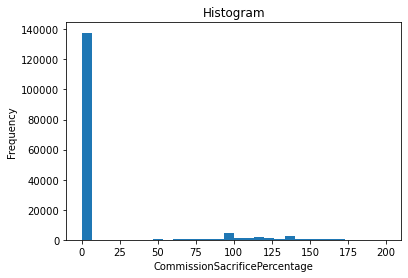

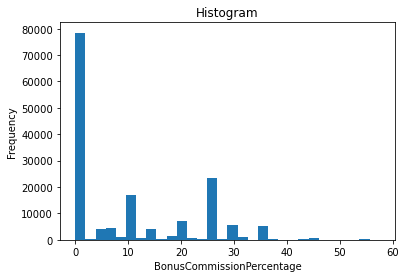

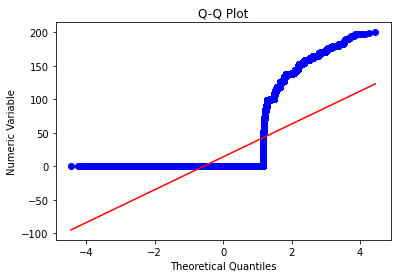

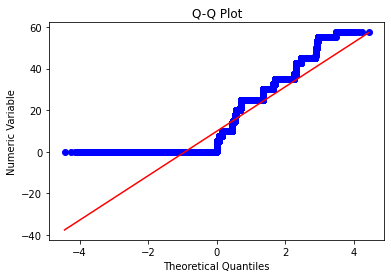

In [80]:
# Visual inspection - Histogram
for column in numeric_data:
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Visual inspection - Q-Q plot
for column in numeric_data:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Numeric Variable')
    plt.title('Q-Q Plot')
    plt.show()

In [81]:
# Select numeric columns
numeric_data = df_log1p.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness)

Skewness:
CommissionSacrificePercentage    2.305273
BonusCommissionPercentage        0.169898
dtype: float64


The skewness statistics show right-skewed distributions for both CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is relatively pronounced showing a concentration of data towards the lower end with a rightward tail. BonusCommissionPercentage has a right-skewed distribution as well, although the skewness is considerably weaker than in CommissionSacrificePercentage.

In [82]:
# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0


#### Square-root transormation

In [83]:
df_sqrt = df.copy()

for column in outlier_columns:
    df_sqrt[column] = np.sqrt(df_sqrt[column])

numeric_data = df_sqrt.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0


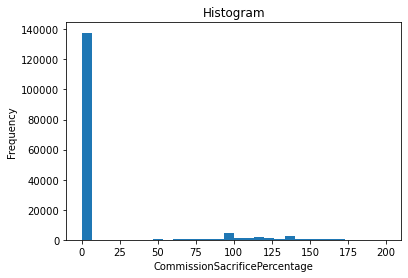

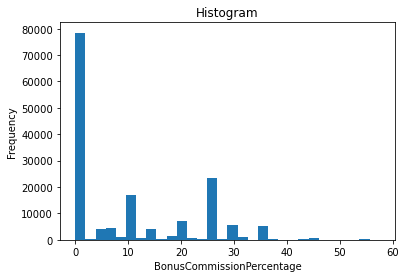

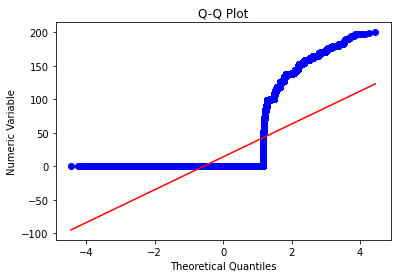

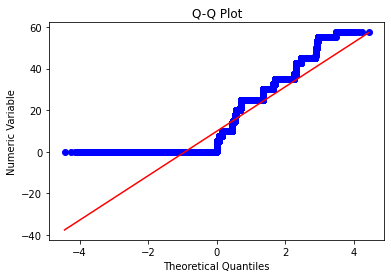

In [84]:
# Visual inspection - Histogram
for column in numeric_data:
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Visual inspection - Q-Q plot
for column in numeric_data:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Numeric Variable')
    plt.title('Q-Q Plot')
    plt.show()

In [85]:
# Select numeric columns
numeric_data = df_sqrt.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness)

Skewness:
CommissionSacrificePercentage    2.377241
BonusCommissionPercentage        0.334814
dtype: float64


The revised skewness statistics show right-skewed distributions for both CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is relatively pronounced showing a concentration of data towards the lower end with a rightward tail. BonusCommissionPercentage has a right-skewed distribution as well, although the skewness is considerably weaker than in CommissionSacrificePercentage.

#### Winsorize

In [86]:
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_winsorize = df.copy()

for column in outlier_columns:
    # Winsorize the column at the 1st and 99th percentiles
    winsorized_values = winsorize(df_winsorize[column], limits=[0.01, 0.01])
    df_winsorize[column] = winsorized_values

numeric_data = df_winsorize.select_dtypes(include=[np.number])

# Apply the function to each column of DataFrame
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage          17752
1      BonusCommissionPercentage           7117


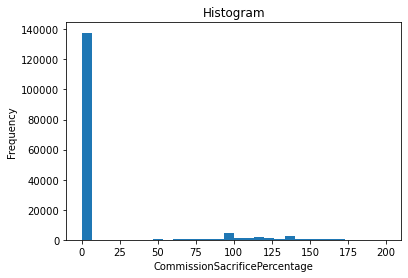

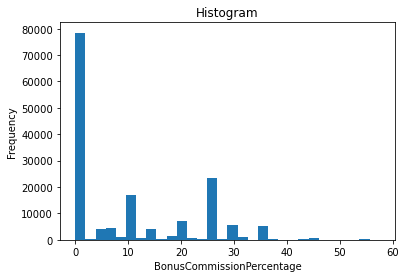

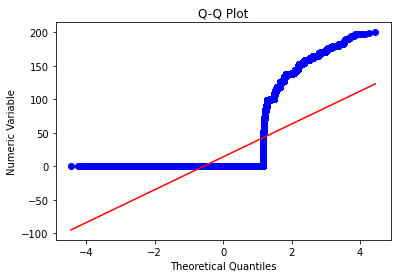

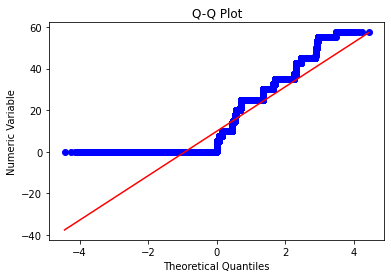

In [87]:
# Visual inspection - Histogram
for column in numeric_data:
    plt.hist(df[column], bins=30)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Visual inspection - Q-Q plot
for column in numeric_data:
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Numeric Variable')
    plt.title('Q-Q Plot')
    plt.show()

In [88]:
# Select numeric columns
numeric_data = df_winsorize.select_dtypes(include=[np.number])

# Calculate skewness for each column
skewness = numeric_data.apply(lambda x: skew(x.dropna()))

# Print the skewness values
print("Skewness:")
print(skewness)

Skewness:
CommissionSacrificePercentage    2.547847
BonusCommissionPercentage        0.827890
dtype: float64


Skewness values show right-skewed distributions for both CommissionSacrificePercentage and BonusCommissionPercentage. The skewness in CommissionSacrificePercentage is relatively pronounced, showing a concentration of data towards the lower end with a rightward tail. BonusCommissionPercentage has a right-skewed distribution as well, although the skewness is considerably weaker than in CommissionSacrificePercentage.

Based on the above, a decision was made to log transform both numeric variables. This should have the effect of eliminating the most extreme outliers from the dataset.

In [89]:
# Apply logarithm to the specified columns
outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']
for column in outlier_columns:
    df[column] = np.log1p(df[column])

In [90]:
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

In [91]:
outliers

,CommissionSacrificePercentage,BonusCommissionPercentage
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
157258,False,False
157259,False,False
157260,True,False
157261,True,False


In [92]:
# Select numeric columns
numeric_data = df.select_dtypes(include=[np.number])
mad = numeric_data.mad()
k = 3

# Calculate the threshold value
threshold = k * mad

# Identify outliers
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

outlier_columns = ['CommissionSacrificePercentage', 'BonusCommissionPercentage']

df_log1p = df.copy()

for column in outlier_columns:
    df_log1p[column] = np.log1p(df_log1p[column])
    
numeric_data = df_log1p.select_dtypes(include=[np.number])
    
# Identify outliers
outliers = (np.abs(numeric_data - numeric_data.median()) > threshold)

# Count the number of outliers in each column
outlier_counts = outliers.sum()

# Create a new DataFrame from outlier_counts
outlier_table = pd.DataFrame({'Column': outlier_counts.index, 'Outlier Count': outlier_counts.values})

# Display the table
print(outlier_table)

                          Column  Outlier Count
0  CommissionSacrificePercentage              0
1      BonusCommissionPercentage              0
